<a href="https://colab.research.google.com/github/KalyaniPusadkar/Data-Visualization-with-Python/blob/main/Potato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [27]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS= 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2033 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

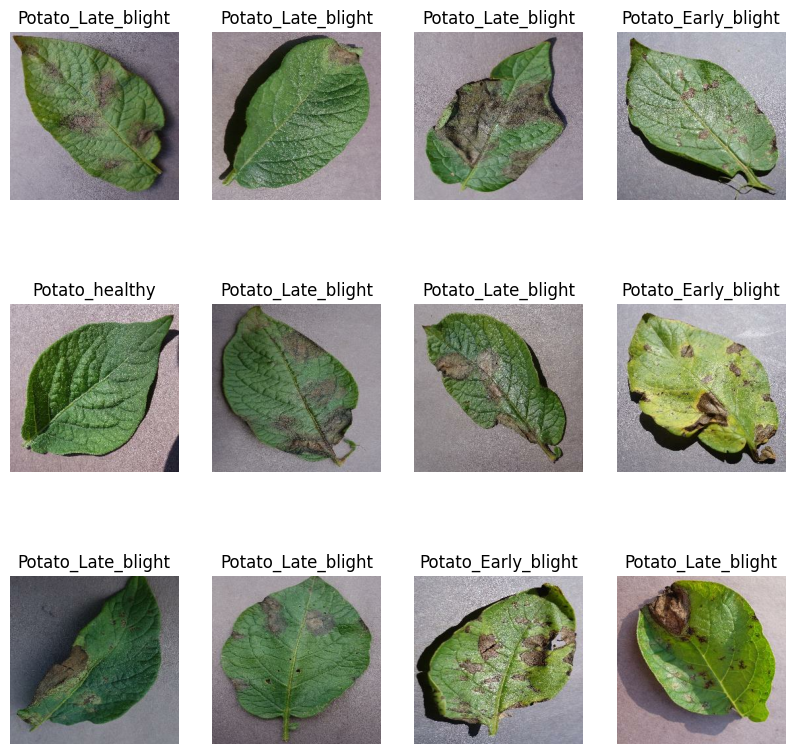

In [5]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax= plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")



In [21]:
len(dataset)

64

In [22]:
train_size = 0.8
len(dataset)*train_size

51.2

In [12]:
train_ds = dataset.take(51)
len(train_ds)

51

In [13]:
test_ds = dataset.skip(51)
len(test_ds)

13

In [14]:
val_size=0.1
len(dataset)*val_size

6.4

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

7

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

**Model Building**

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
51/51 [==============================] - 204s 4s/step - loss: 0.8519 - accuracy: 0.5325 - val_loss: 0.7971 - val_accuracy: 0.5990
Epoch 2/50
51/51 [==============================] - 198s 4s/step - loss: 0.5229 - accuracy: 0.7708 - val_loss: 0.5105 - val_accuracy: 0.7969
Epoch 3/50
51/51 [==============================] - 209s 4s/step - loss: 0.3927 - accuracy: 0.8217 - val_loss: 0.4159 - val_accuracy: 0.8438
Epoch 4/50
51/51 [==============================] - 201s 4s/step - loss: 0.2756 - accuracy: 0.8946 - val_loss: 0.3750 - val_accuracy: 0.8490
Epoch 5/50
51/51 [==============================] - 203s 4s/step - loss: 0.3029 - accuracy: 0.8811 - val_loss: 0.2953 - val_accuracy: 0.8750
Epoch 6/50
51/51 [==============================] - 197s 4s/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.3396 - val_accuracy: 0.8594
Epoch 7/50
51/51 [==============================] - 203s 4s/step - loss: 0.1935 - accuracy: 0.9203 - val_loss: 0.5345 - val_accuracy: 0.8385
Epoch 8/50
51

In [33]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 17s 2s/step - loss: 0.2115 - accuracy: 0.9426


In [34]:
scores

[0.2114856094121933, 0.9425837397575378]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

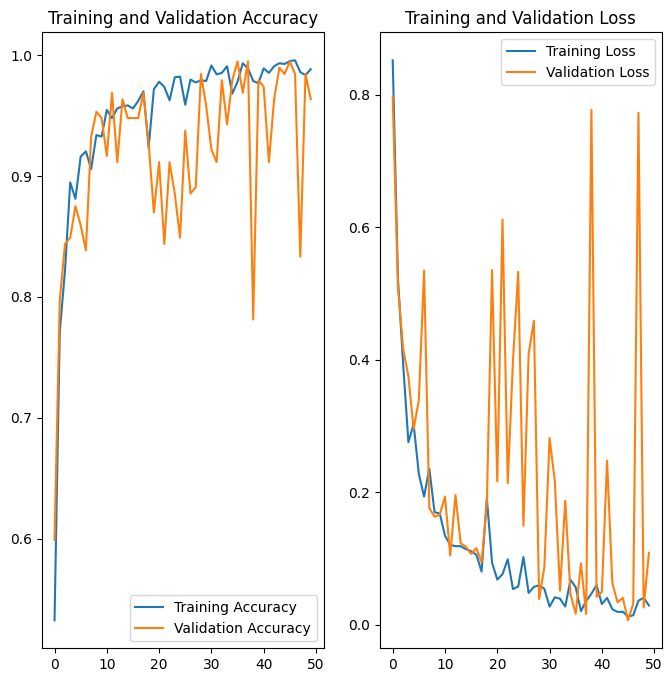

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato_Early_blight
1/1 [==============================] - 1s 995ms/step
predicted label: Potato_Early_blight


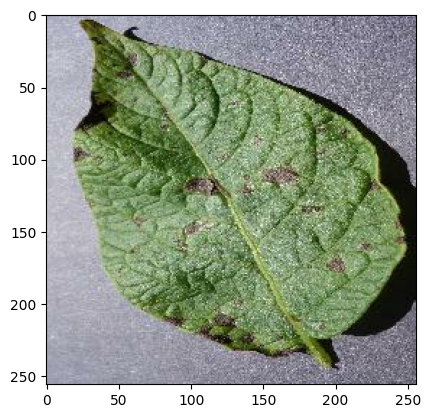

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


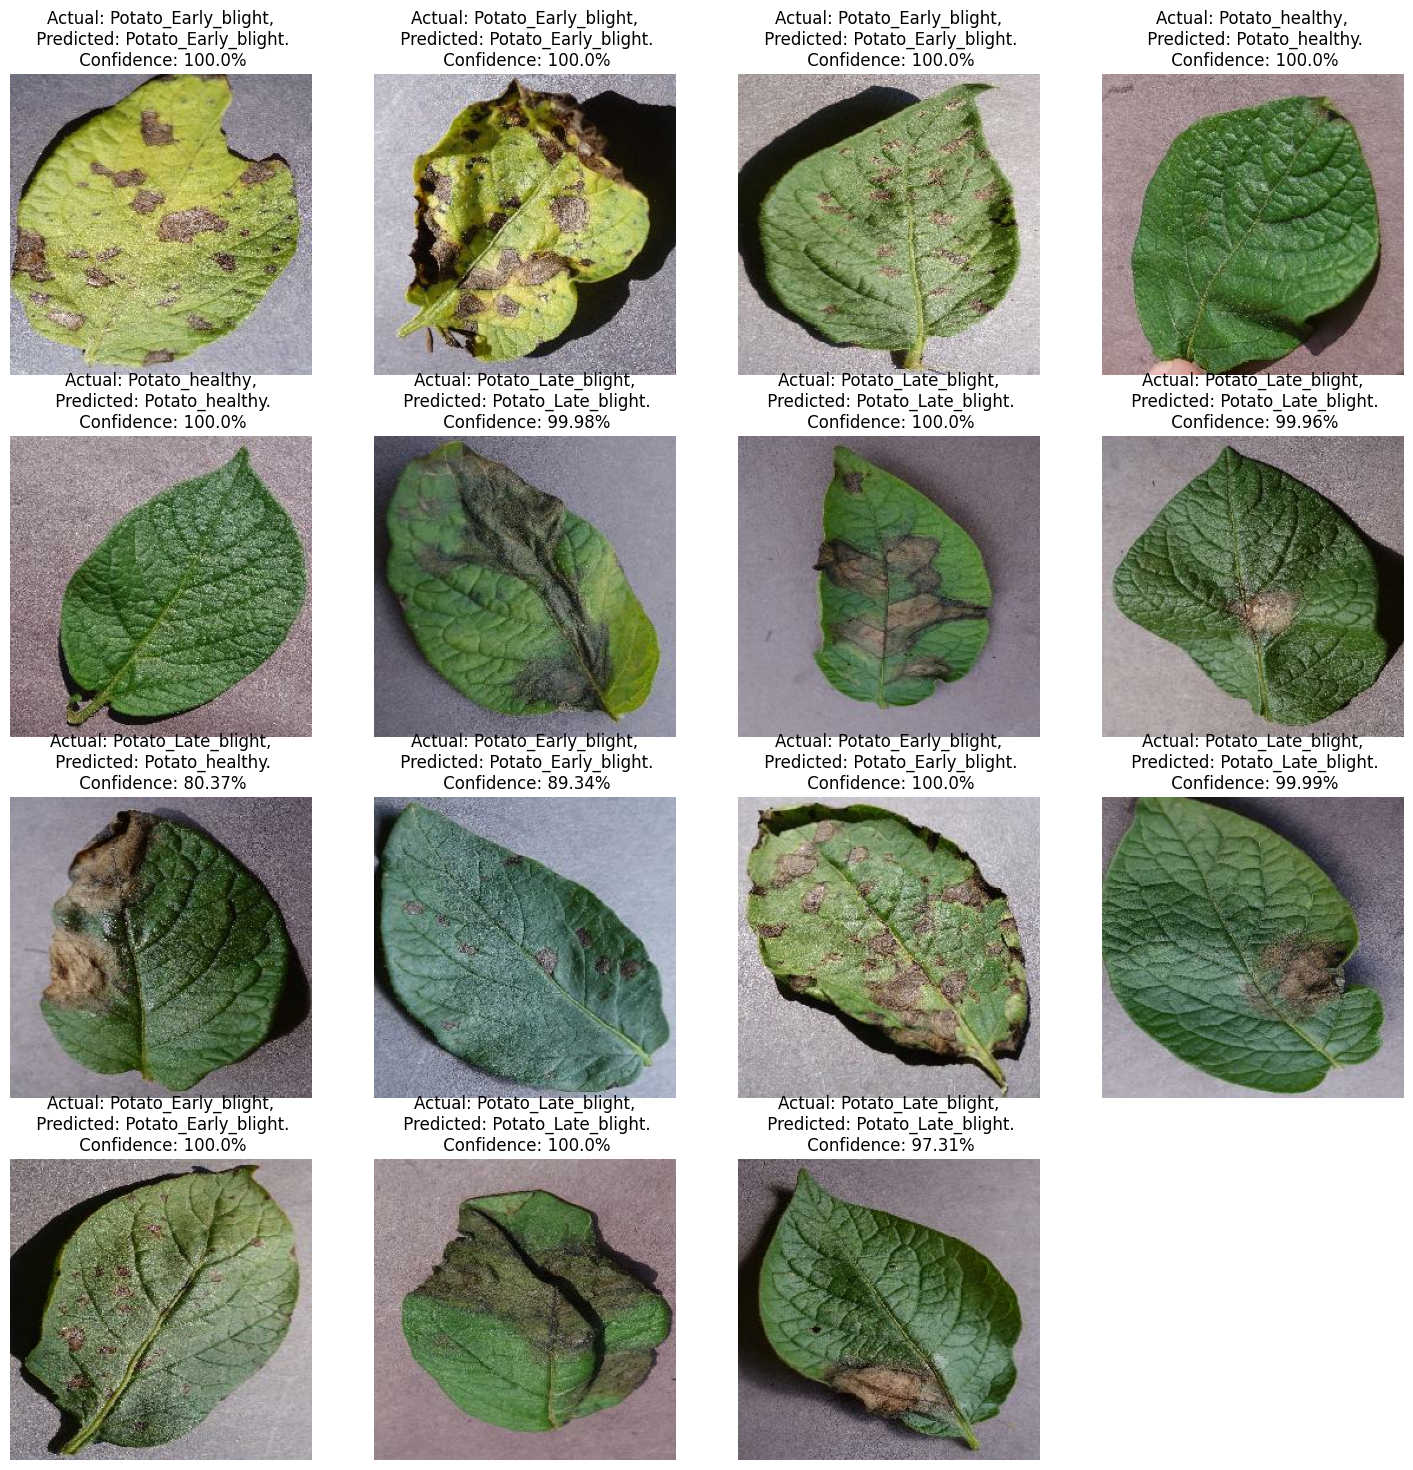

In [62]:
plt.figure(figsize=(18, 18))
for images, labels in test_ds.take(1):
    for i in range(15):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [64]:
model.save("/potatoes.h5")